#First Things First -> Mount Drive, Import Libraries, Auto-reload setup

In [1]:
##Run this cell once and then comment it out.
# !pip install -q transformers datasets huggingface_hub evaluate sentencepiece scikit-learn imbalanced-learn accelerate torch pandas matplotlib

In [2]:
import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "offline"
os.environ["WANDB_SILENT"] = "true"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'My Drive', 'ColabNotebooks', 'DL','Deep Learning Project Full','DL Team Project', '20251126_22.47_DL_Team_Project_Code_Files_Structure')
print(os.listdir(GOOGLE_DRIVE_PATH))

['environment.yml', 'Archive or Obsolete', 'configs', 'Obsolete - models', 'src', 'data', '__pycache__', 'outputs', '20251126_22.47_KP_DL_Project_ColabNotebook.ipynb']


In [5]:
import sys

sys.path.append(GOOGLE_DRIVE_PATH)

In [6]:
# if running locally set GOOGLE PATH
import sys
if 'google.colab' in sys.modules:
  print(f'Running in google colab. Our path is `{GOOGLE_DRIVE_PATH}`')
else:
  GOOGLE_DRIVE_PATH = '.'
  print('Running locally.')

Running in google colab. Our path is `/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project/20251126_22.47_DL_Team_Project_Code_Files_Structure`


In [7]:
print("Current working directory:", os.getcwd())

Current working directory: /content


In [8]:
# ch dir to project folder
os.chdir(GOOGLE_DRIVE_PATH)

In [9]:
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project/20251126_22.47_DL_Team_Project_Code_Files_Structure


In [10]:
import imp

ModuleNotFoundError: No module named 'imp'

In [ ]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2

In [ ]:
##Run this cell once and then comment it out.
# !pip install -q --upgrade transformers datasets huggingface_hub

In [11]:
# optional: check torch & CUDA
import torch
print("torch:", torch.__version__, "cuda_available:", torch.cuda.is_available())

torch: 2.9.0+cu126 cuda_available: True


#Ignore and move on to the section that says START HERE
code for exploring Raw Data and Preparing Pre-Processed Data

##**Prepare the pre-processed data **

(DO NOT RUN THIS CELL). Directly go to next section to import pre-processed data and continue from there to explore the data (EDA) and then run models in next cells.

In [ ]:
# '''
# (run this cell only if needed). Use the next cell directly to import the csv file called
# data_train.csv to load data and then run models.
# '''

# # # Cell A: data prep (team-safe)
# import os
# os.environ["WANDB_DISABLED"] = "true"

# from src.common_data_prep import prepare_data

# res_prep = prepare_data(
#     repo_id="McAuley-Lab/Amazon-Reviews-2023",
#     chosen_jsonl="raw/review_categories/All_Beauty.jsonl",
#     output_root="outputs",
#     data_root="data",
#     model_name_tag="All_Beauty_prep",
#     subset_sample=None,         # small for debugging; set None to use full oversampled train
#     downsample_target=200000,     # or 200000
#     max_words=256,
#     langdetect_ok=True
# )

# print("Prep done. Tokenized saved in:", res_prep["run_outdir"])
# print("Train rows:", res_prep["info"]["train_rows"])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


raw/review_categories/All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loaded dataset: Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 701528
})
column names in raw data ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']
length of raw_data 701528
shown below is the ds.head
class counts of raw data rating
5.0    420726
1.0    102080
4.0     79381
3.0     56307
2.0     43034
Name: count, dtype: int64
Saved CSV: data/raw_data.csv


Map:   0%|          | 0/701528 [00:00<?, ? examples/s]

Filter:   0%|          | 0/701528 [00:00<?, ? examples/s]

Map:   0%|          | 0/701528 [00:00<?, ? examples/s]

Filter:   0%|          | 0/701528 [00:00<?, ? examples/s]

After English filter (robust) rows: 578425


Filter:   0%|          | 0/578425 [00:00<?, ? examples/s]

length after dropping empty texts and missing labels 578425


Casting the dataset:   0%|          | 0/578425 [00:00<?, ? examples/s]

length after cast label to label 3 578425
class counts of data before splitting, before oversampling, before downsampling label3
2    399038
0    128778
1     50609
Name: count, dtype: int64
length of train data after splitting data but before oversampling 462745
length of validation data after splitting data but before oversampling 57837
length of test data after splitting data but before oversampling 57843
length of train_bal after oversampling 957702
class counts of oversampled data label3
2    319234
0    319234
1    319234
Name: count, dtype: int64


Casting the dataset:   0%|          | 0/957702 [00:00<?, ? examples/s]

train_bal columns: ['rating', 'text', 'label3', 'label5', 'year', 'lang']
length of train_bal after downsampling 200000
class counts of downsampled data label3
0    66667
2    66667
1    66666
Name: count, dtype: int64


Map:   0%|          | 0/200000 [00:00<?, ? examples/s]

Map:   0%|          | 0/57837 [00:00<?, ? examples/s]

Map:   0%|          | 0/57843 [00:00<?, ? examples/s]

truncate by words completed on train, val and test data
pre-processed csv file path join completed
Saved CSV: data/data_train.csv
pre-processed csv file saved into data folder


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/200000 [00:00<?, ? examples/s]

Map:   0%|          | 0/57837 [00:00<?, ? examples/s]

Map:   0%|          | 0/57843 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/57837 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/57843 [00:00<?, ? examples/s]

Prep done. Tokenized saved in: outputs/All_Beauty_prep_20251128_025006
Train rows: 200000


In [ ]:
'''
(run this cell only if needed). Use the next cell directly to import the csv file called
data_train.csv to load data and then run models.
'''

# # Cell A: data prep (team-safe)
import os
os.environ["WANDB_DISABLED"] = "true"

from src.common_data_prep import prepare_data

res_prep = prepare_data(
    repo_id="McAuley-Lab/Amazon-Reviews-2023",
    chosen_jsonl="raw/review_categories/All_Beauty.jsonl",
    output_root="outputs",
    data_root="data",
    model_name_tag="All_Beauty_prep",
    subset_sample=None,         # small for debugging; set None to use full oversampled train
    downsample_target=200000,     # or 200000
    downsample_val_target=20000,
    downsample_test_target=20000,
    max_words=256,
    langdetect_ok=True
)

print("Prep done. Tokenized saved in:", res_prep["run_outdir"])
print("Train rows:", res_prep["info"]["train_rows"])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


raw/review_categories/All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loaded dataset: Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 701528
})
column names in raw data ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']
length of raw_data 701528
shown below is the ds.head
class counts of raw data rating
5.0    420726
1.0    102080
4.0     79381
3.0     56307
2.0     43034
Name: count, dtype: int64
Saved CSV: data/raw_data.csv


Map:   0%|          | 0/701528 [00:00<?, ? examples/s]

Map:   0%|          | 0/701528 [00:00<?, ? examples/s]

Filter:   0%|          | 0/701528 [00:00<?, ? examples/s]

After English filter (robust) rows: 578425


Filter:   0%|          | 0/578425 [00:00<?, ? examples/s]

length after dropping empty texts and missing labels 578425


Casting the dataset:   0%|          | 0/578425 [00:00<?, ? examples/s]

length after cast label to label 3 578425
class counts of data before splitting, before oversampling, before downsampling label3
2    399038
0    128778
1     50609
Name: count, dtype: int64
length of train data after splitting data but before oversampling 462745
length of validation data after splitting data but before oversampling 57837
length of test data after splitting data but before oversampling 57843
length of train_bal after oversampling 957702
class counts of oversampled data label3
2    319234
0    319234
1    319234
Name: count, dtype: int64


Casting the dataset:   0%|          | 0/957702 [00:00<?, ? examples/s]

train_bal columns: ['rating', 'text', 'label3', 'label5', 'year', 'lang']
length of train_bal after downsampling 200000
class counts of downsampled data label3
0    66667
2    66667
1    66666
Name: count, dtype: int64


Casting the dataset:   0%|          | 0/57837 [00:00<?, ? examples/s]

val columns: ['rating', 'text', 'label3', 'label5', 'year', 'lang']
length of val after downsampling 20000
class counts of downsampled val data label3
2    13797
0     4453
1     1750
Name: count, dtype: int64


Casting the dataset:   0%|          | 0/57843 [00:00<?, ? examples/s]

test columns: ['rating', 'text', 'label3', 'label5', 'year', 'lang']
length of test after downsampling 20000
class counts of downsampled test data label3
2    13797
0     4453
1     1750
Name: count, dtype: int64


Map:   0%|          | 0/200000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

truncate by words completed on train, val and test data
pre-processed csv file path for data_train join completed
pre-processed csv file path for data_val join completed
pre-processed csv file path for data_test join completed
Saved CSV: data/data_train.csv
pre-processed csv file for train_data saved into data folder
Saved CSV: data/data_val.csv
pre-processed csv file for val_data saved into data folder
Saved CSV: data/data_test.csv
pre-processed csv file for test_data saved into data folder
Prep done. Tokenized saved in: outputs/prep_20251129T101112Z
Train rows: 200000


##If you really want to look at the raw-data, then use below cells. (Otherwise ignore this - recommended, to save your time move on to next section).

In [ ]:
#Import raw data
csv_path = f"{GOOGLE_DRIVE_PATH}/data/raw_data.csv"

# ---------------------------------------
# Load CSV
# ---------------------------------------
df_rawData = pd.read_csv(csv_path)

# ---------------------------------------
# Keep only needed columns (drop lang)
# ---------------------------------------
df_rawData = df_rawData.drop(columns=["lang"])   # remove lang column

#Just for Information: Number of rows in pre-processed data = 701,528



In [ ]:
df_rawData.head()

#**START HERE**
If not already done, complete running the First Things First Section before Starting Here

##Load Pre-Processed Data

Note: In Label3 class: 2 means positive rating, 1 means neutral and 0 means negative. (Useful for sentiment analysis).

In [22]:
#Just for Information: Number of rows in pre-processed data = 578,425
import pandas as pd
#Import pre-processed data
csv_path_train_data = f"{GOOGLE_DRIVE_PATH}/data/data_train.csv"
csv_path_val_data = f"{GOOGLE_DRIVE_PATH}/data/data_val.csv"
csv_path_test_data = f"{GOOGLE_DRIVE_PATH}/data/data_test.csv"


# ---------------------------------------
# 3. Load CSV
# ---------------------------------------
train_bal = pd.read_csv(csv_path_train_data)
val = pd.read_csv(csv_path_val_data)
test = pd.read_csv(csv_path_test_data)
# ---------------------------------------
# 4. Keep only needed columns (drop lang)
# ---------------------------------------
train_bal = train_bal.drop(columns=["label5","lang"])   # remove lang and label 5 column
val = val.drop(columns=["label5","lang"])   # remove lang and label 5 column
test = test.drop(columns=["label5","lang"])   # remove lang and label 5 column

# train_bal = train_bal.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column
# val = val.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column
# test = test.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column



#For training & deubgging choose only 2000 or so samples subset
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# >>>>>>>>>>>>>>>>>>>Disable below line for full training sample set which has total 578,425 rows (or data points)  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

train_bal = train_bal.sample(n=2000, random_state=42)

# OR if you only want these columns:
# df = df[["text", "rating", "label3", "label5"]]

print("Train:", train_bal.shape)
print("Val:", val.shape)
print("Test:", test.shape)

Train: (2000, 3)
Val: (20000, 3)
Test: (20000, 3)


##Train & evaluate (set MODEL_NAME and hyperparams here) - Less Epochs used here to debug if the model is running fine or not

###**Train and then Print metrics (for less epochs training)**
Note: Be careful to choose correct Model and Hyper Parameters before you run below cells.

In [25]:
# Cell B: train & evaluate
from src.model import train_and_evaluate

# Set model and hyperparams here (free to change in notebook)
MODEL_NAME = "distilbert-base-uncased"   # change to any HuggingFace model
num_labels = 3
training_args_overrides = {
    "per_device_train_batch_size": 8,
    "per_device_eval_batch_size": 16,
    "num_train_epochs": 2,
    "learning_rate": 2e-5,
    "logging_steps": 50
}

#MODEL_CONFIGS
# install datasets if missing: pip install datasets
from datasets import Dataset
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased", use_fast=True)
def tokenize_batch(batch):
  # batch is a dict of lists when batched=True
  return tokenizer(batch["text"], truncation=True, max_length=256)
# remove text for train to save disk, keep for val/test

# If train_bal is a pandas DataFrame, convert:
train_ds = Dataset.from_pandas(train_bal.reset_index(drop=True))
val_ds   = Dataset.from_pandas(val.reset_index(drop=True))
test_ds  = Dataset.from_pandas(test.reset_index(drop=True))

# train_tok = train_ds.map(tokenize_batch, batched=True, remove_columns=["text", "rating"])
# val_tok = val_ds.map(tokenize_batch, batched=True, remove_columns=["text", "rating"])
# test_tok = test_ds  .map(tokenize_batch, batched=True, remove_columns=["text", "rating"])

# 1) rename label3 -> labels (if needed) and ensure ints
train_ds = train_ds.rename_column("label3", "labels") if "label3" in train_ds.column_names else train_ds
val_ds   = val_ds.rename_column("label3", "labels") if "label3" in val_ds.column_names else val_ds
test_ds  = test_ds.rename_column("label3", "labels") if "label3" in test_ds.column_names else test_ds

# #If your data are pandas DataFrames instead, do this first to convert/rename:
# df_train = df_train.rename(columns={"label3":"labels"})  # pandas rename
# # convert to HF Dataset
# from datasets import Dataset
# train_ds = Dataset.from_pandas(df_train.reset_index(drop=True))
# # repeat for val/test then follow the HF Dataset steps above


# make sure labels are ints (safe idempotent map)
train_ds = train_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)
val_ds   = val_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)
test_ds  = test_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)

##tokenize but DO NOT remove 'labels'
train_tok = train_ds.map(tokenize_batch, batched=True,
                         remove_columns=[c for c in train_ds.column_names if c in ("text","rating")])
val_tok   = val_ds.map(tokenize_batch, batched=True,
                       remove_columns=[c for c in val_ds.column_names if c in ("text","rating")])
test_tok  = test_ds.map(tokenize_batch, batched=True,
                        remove_columns=[c for c in test_ds.column_names if c in ("text","rating")])

# 3) set format to torch and include labels
train_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])






res_train = train_and_evaluate(
    train_tok=train_tok,
    val_tok=val_tok,
    test_tok=test_tok,
    MODEL_NAME=MODEL_NAME,
    num_labels=num_labels,
    training_args_overrides=training_args_overrides,
    output_root="outputs",
    run_name_suffix="student_debug"
)

print("Train done. run_outdir:", res_train["run_outdir"])
print("Eval metrics:", res_train["eval"]["metrics"])


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project/20251126_22.47_DL_Team_Project_Code_Files_Structure/src/model.py:103: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.617700,0.496942,0.812100,0.880451,0.812100,0.837208
2,0.499500,0.486658,0.812100,0.886777,0.812100,0.839369


Saved trainer history CSV to outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug/trainer_history.csv


Appended results to outputs/team_comparison_results.csv
Train done. run_outdir: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug
Eval metrics: {'accuracy': 0.8086, 'precision': 0.888231595707487, 'recall': 0.8086, 'f1': 0.8373194174752813, 'precision_per_class': [0.8352244696595955, 0.2880658436213992, 0.981464240372408], 'recall_per_class': [0.7603862564563216, 0.68, 0.8404725664999637], 'f1_per_class': [0.7960503115081697, 0.4046930794082639, 0.9055130407621428], 'support_per_class': [4453, 1750, 13797], 'confusion_matrix': [[3386, 1015, 52], [393, 1190, 167], [275, 1926, 11596]]}


###Plot Curves (for less epochs training)

####General Plot Curve Code

In [ ]:
# # CELL: Plot loss vs epochs (use res_train)
# # Requires res_train variable from train_and_evaluate(...)
# from src.utils import plot_loss_vs_epochs
# import os

# run_outdir = res_train["run_outdir"]
# print("Reading logs from:", run_outdir)

# # Prefer the saved trainer_history.csv then fallback to trainer.state.log_history
# hist_csv = os.path.join(run_outdir, "trainer_history.csv")
# df_epochs = plot_loss_vs_epochs(trainer=res_train.get("trainer"), hist_csv=hist_csv, run_outdir=run_outdir)

# if df_epochs.empty:
#     print("No epoch-level data to plot. If you see only one epoch, try training with num_train_epochs>=2 to produce a curve.")
# else:
#     print("Epoch table:\n", df_epochs)


Saved epoch CSV to: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug/loss_per_epoch.csv
Saved loss plot to: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug/loss_curve.png


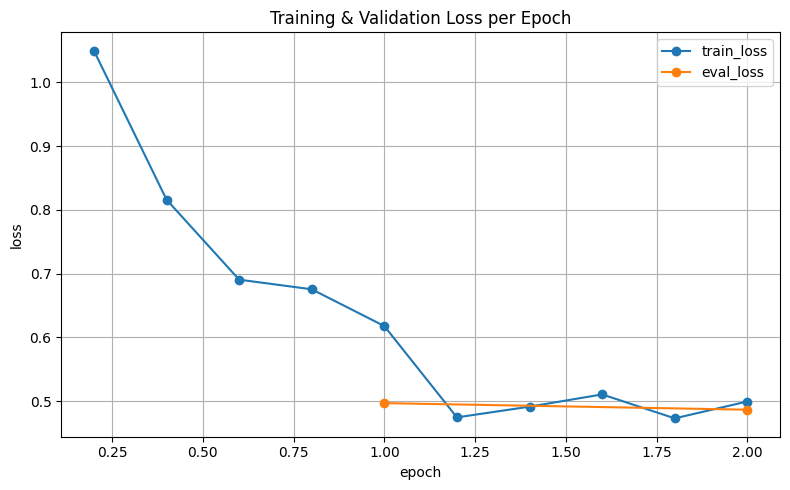

   epoch  train_loss  eval_loss  learning_rate
0    0.2      1.0494        NaN   1.804000e-05
1    0.4      0.8159        NaN   1.604000e-05
2    0.6      0.6905        NaN   1.404000e-05
3    0.8      0.6754        NaN   1.204000e-05
4    1.0      0.6177   0.496942   1.004000e-05
5    1.2      0.4746        NaN   8.040000e-06
6    1.4      0.4914        NaN   6.040000e-06
7    1.6      0.5106        NaN   4.040000e-06
8    1.8      0.4731        NaN   2.040000e-06
9    2.0      0.4995   0.486658   4.000000e-08


<Figure size 600x600 with 0 Axes>

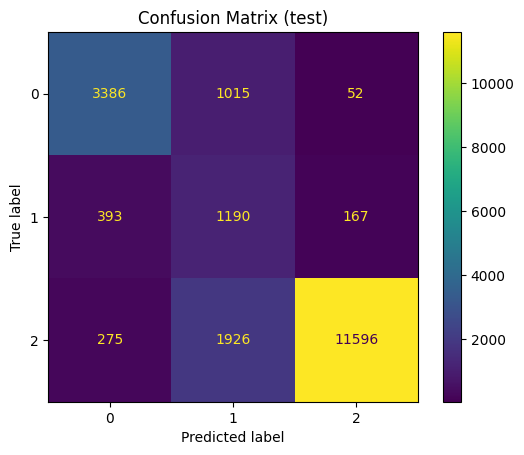

Saved loss plots and classification artifacts into: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug


In [31]:
# # COMBINED CELL: plot loss + save loss CSV + classification report + confusion matrix
# from src.utils import plot_loss_vs_epochs
# import os, json
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# run_outdir = res_train["run_outdir"]

# # #0) print metrics
# # # 2) Prefer trainer_history.csv if present, else parse trainer.state.log_history
# # hist_csv = os.path.join(run_outdir, "trainer_history.csv")
# # df_epochs = plot_loss_vs_epochs(trainer=trainer, hist_csv=hist_csv, run_outdir=run_outdir, show_plot=True)

# # 1) Loss plot
# hist_csv = os.path.join(run_outdir, "trainer_history.csv")
# df_epochs = plot_loss_vs_epochs(trainer=res_train.get("trainer"), hist_csv=hist_csv, run_outdir=run_outdir)
# print(df_epochs)

# # 2) Classification report + confusion matrix
# trainer = res_train["trainer"]
# test_tok = res_train["test_tok"]
# pred_out = trainer.predict(test_tok)
# y_true = pred_out.label_ids
# y_pred = pred_out.predictions.argmax(axis=-1)

# report = classification_report(y_true, y_pred, digits=4, output_dict=True)
# with open(os.path.join(run_outdir, "classification_report_combined.json"), "w", encoding="utf-8") as fh:
#     json.dump(report, fh, indent=2)
# pd.DataFrame(report).transpose().to_csv(os.path.join(run_outdir, "classification_report_combined.csv"))

# cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# plt.figure(figsize=(6,6))
# disp.plot(values_format='d')
# plt.title("Confusion Matrix (test)")
# plt.savefig(os.path.join(run_outdir, "confusion_matrix_combined.png"), bbox_inches='tight')
# plt.show()

# print("Saved loss plots and classification artifacts into:", run_outdir)


'''
Quick reminders (simple)

To get a proper curve, train for 2 or more epochs (set num_train_epochs >= 2).

The in-session cell saves trainer_state_log_history.json and loss_per_epoch.csv to the run folder. The post-session cell reads those files so you don’t need to retrain.

If auto-find picks the wrong folder, paste run_outdir manually in Cell B or C.


'''

'''
Below is a tiny single-line notebook cell that auto-selects the most recent run folder under outputs/, prints its path, and loads both loss_per_epoch.csv (into df) and a trainer log JSON (trainer_state_log_history.json or trainer_state.json) into log. It prints how many rows/entries were loaded so you know it worked.
'''

In [ ]:
run_outdir = max([d for d in __import__('glob').glob('outputs/*') if __import__('os').path.isdir(d)], key=__import__('os').path.getmtime); print("run_outdir:", run_outdir); import json, pandas as pd, os; csv_path=os.path.join(run_outdir,'loss_per_epoch.csv'); df = pd.read_csv(csv_path) if os.path.exists(csv_path) else pd.DataFrame(); log_path=os.path.join(run_outdir,'trainer_state_log_history.json'); log = json.load(open(log_path)) if os.path.exists(log_path) else (json.load(open(os.path.join(run_outdir,'trainer_state.json'))) if os.path.exists(os.path.join(run_outdir,'trainer_state.json')) else None); print("loss_per_epoch rows:", len(df), " | log entries:", (len(log) if log else 0))


**If neither JSON exists, log will be None.**

####Cell A — run this immediately after training (session active) — uses the trainer in memory and saves useful files into the run folder.

In [ ]:
# #Cell 1 — In-session plotting (run right after training)
# # CELL: Plot loss vs epochs now (session active)
# # Requires: res_train from train_and_evaluate(...) containing 'trainer' and 'run_outdir'
# from src.plot_utils import plot_loss_vs_epochs, parse_trainer_log_history
# import json, os

# if "res_train" not in globals():
#     raise ValueError("res_train not found. Run training cell first and keep res_train in session.")

# trainer = res_train["trainer"]
# run_outdir = res_train["run_outdir"]
# print("Using run_outdir:", run_outdir)

# # Save trainer.state.log_history to JSON (safe for post-session)
# try:
#     log_history = getattr(trainer.state, "log_history", None)
#     if log_history:
#         os.makedirs(run_outdir, exist_ok=True)
#         with open(os.path.join(run_outdir, "trainer_state_log_history.json"), "w", encoding="utf-8") as fh:
#             json.dump(log_history, fh, indent=2)
#         print("Saved trainer_state_log_history.json to run folder.")
#     else:
#         print("trainer.state.log_history is empty or not found.")
# except Exception as e:
#     print("Warning: could not save trainer_state.log_history:", e)

# # Prefer trainer_history.csv if trainer saved it; else use trainer.state.log_history
# hist_csv = os.path.join(run_outdir, "trainer_history.csv")
# df_epochs = plot_loss_vs_epochs(trainer=trainer, hist_csv=hist_csv, run_outdir=run_outdir, show_plot=True)

# if df_epochs.empty:
#     print("No epoch-level losses found. If you trained only 1 epoch you'll see a single point. Train >=2 epochs for a curve.")
# else:
#     print("Epoch table (last train loss and eval loss per epoch):")
#     print(df_epochs)
#     # Loss CSV already saved by the function as loss_per_epoch.csv


Using run_outdir: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug
Saved trainer_state_log_history.json to: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug/trainer_state_log_history.json
Saved epoch CSV to: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug/loss_per_epoch.csv
Saved loss plot to: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug/loss_curve.png


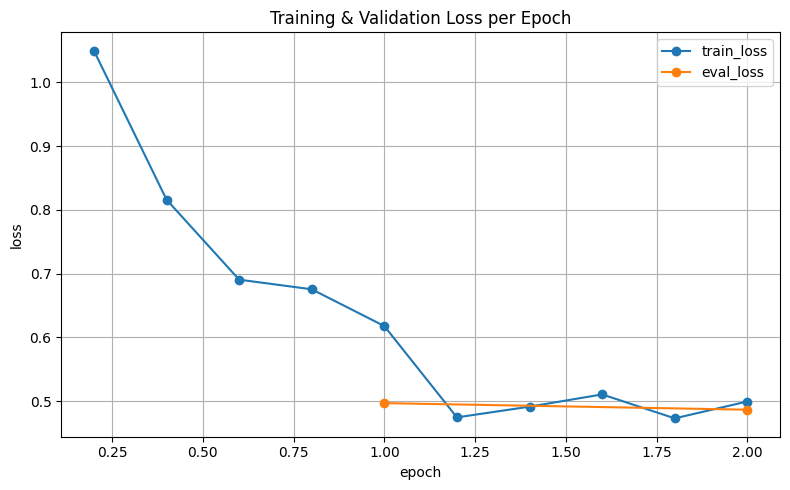

Epoch table (last training loss and eval loss per epoch):
   epoch  train_loss  eval_loss  learning_rate
0    0.2      1.0494        NaN   1.804000e-05
1    0.4      0.8159        NaN   1.604000e-05
2    0.6      0.6905        NaN   1.404000e-05
3    0.8      0.6754        NaN   1.204000e-05
4    1.0      0.6177   0.496942   1.004000e-05
5    1.2      0.4746        NaN   8.040000e-06
6    1.4      0.4914        NaN   6.040000e-06
7    1.6      0.5106        NaN   4.040000e-06
8    1.8      0.4731        NaN   2.040000e-06
9    2.0      0.4995   0.486658   4.000000e-08


<Figure size 600x600 with 0 Axes>

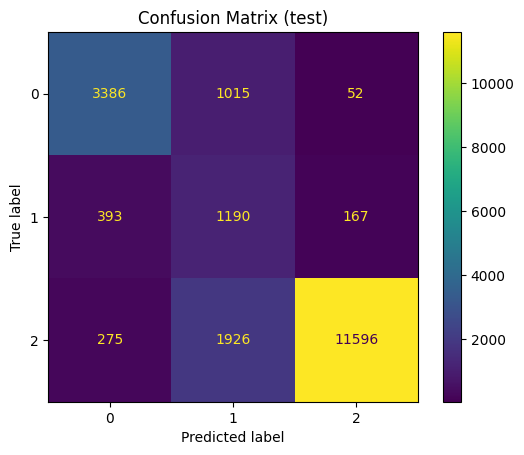

Saved loss plots and classification artifacts into: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug


In [33]:
# CELL A: In-session plotting (run right after training)
# Paste and run this cell after your training cell that produced `res_train`.
# It reads trainer.state.log_history, saves JSON+CSV for later, and plots loss curves.

import os
import json
from src.utils import plot_loss_vs_epochs, parse_trainer_log_history

# check res_train
if "res_train" not in globals():
    raise ValueError("res_train not found. Run training (train_and_evaluate) first and keep res_train in the session.")

trainer = res_train["trainer"]
run_outdir = res_train["run_outdir"]
print("Using run_outdir:", run_outdir)

# 1) Save trainer.state.log_history to JSON for later use (post-session)
try:
    log_history = getattr(trainer.state, "log_history", None)
    if log_history:
        os.makedirs(run_outdir, exist_ok=True)
        json_path = os.path.join(run_outdir, "trainer_state_log_history.json")
        with open(json_path, "w", encoding="utf-8") as fh:
            json.dump(log_history, fh, indent=2)
        print("Saved trainer_state_log_history.json to:", json_path)
    else:
        print("trainer.state.log_history is empty or missing.")
except Exception as e:
    print("Warning: could not save trainer_state.log_history:", e)

# 2) Prefer trainer_history.csv if present, else parse trainer.state.log_history
hist_csv = os.path.join(run_outdir, "trainer_history.csv")
df_epochs = plot_loss_vs_epochs(trainer=trainer, hist_csv=hist_csv, run_outdir=run_outdir, show_plot=True)

if df_epochs.empty:
    print("No epoch-level losses found. If you trained only 1 epoch you'll see a single point. Train >=2 epochs for a curve.")
else:
    print("Epoch table (last training loss and eval loss per epoch):")
    print(df_epochs)
    # loss_per_epoch.csv saved by function when run_outdir provided


# 2) Classification report + confusion matrix
trainer = res_train["trainer"]
test_tok = res_train["test_tok"]
pred_out = trainer.predict(test_tok)
y_true = pred_out.label_ids
y_pred = pred_out.predictions.argmax(axis=-1)

report = classification_report(y_true, y_pred, digits=4, output_dict=True)
with open(os.path.join(run_outdir, "classification_report_combined.json"), "w", encoding="utf-8") as fh:
    json.dump(report, fh, indent=2)
pd.DataFrame(report).transpose().to_csv(os.path.join(run_outdir, "classification_report_combined.csv"))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(values_format='d')
plt.title("Confusion Matrix (test)")
plt.savefig(os.path.join(run_outdir, "confusion_matrix_combined.png"), bbox_inches='tight')
plt.show()

print("Saved loss plots and classification artifacts into:", run_outdir)

####Cell B — run later after session restart — finds the run folder (or use the path you saved) and plots from saved CSV / saved trainer_state JSON without retraining.

In [ ]:
# #Cell 2 — Post-session plotting (after restart; load from disk)

# # CELL: Plot loss vs epochs after session restart (no trainer in memory)
# # Provide run_outdir or auto-find the latest folder under outputs/
# from src.plot_utils import plot_loss_vs_epochs
# import os, glob

# # Option A: paste your run_outdir path here (preferred)
# # run_outdir = "outputs/your_model_lr..._2025xxxx_xxxxxx"
# run_outdir = None

# # Option B: auto-find the most recent run folder under outputs/
# if run_outdir is None:
#     base = "outputs"
#     candidates = [d for d in glob.glob(os.path.join(base, "*")) if os.path.isdir(d)]
#     if not candidates:
#         raise FileNotFoundError("No run folders found under 'outputs/'. Provide run_outdir manually.")
#     # pick newest by modification time
#     run_outdir = max(candidates, key=os.path.getmtime)
#     print("Auto-selected latest run folder:", run_outdir)

# # Prefer the saved epoch CSV if present
# epoch_csv = os.path.join(run_outdir, "loss_per_epoch.csv")
# if os.path.exists(epoch_csv):
#     print("Found loss_per_epoch.csv — plotting from that.")
#     df = plot_loss_vs_epochs(trainer=None, hist_csv=epoch_csv, run_outdir=run_outdir, show_plot=True)
# else:
#     # Try the previously saved trainer_state_log_history.json or trainer_state.json
#     json_candidates = [
#         os.path.join(run_outdir, "trainer_state_log_history.json"),
#         os.path.join(run_outdir, "trainer_state.json"),
#     ]
#     found = False
#     for jpath in json_candidates:
#         if os.path.exists(jpath):
#             print("Found", jpath, "- parsing and plotting.")
#             df = plot_loss_vs_epochs(trainer=None, hist_csv=None, run_outdir=run_outdir, show_plot=True)
#             found = True
#             break
#     if not found:
#         # Try to parse any json under run_outdir
#         parsed = False
#         for root, _, files in os.walk(run_outdir):
#             for f in files:
#                 if f.lower().endswith(".json"):
#                     cand = os.path.join(root, f)
#                     try:
#                         # plot_loss_vs_epochs will scan these files for log_history
#                         df = plot_loss_vs_epochs(trainer=None, hist_csv=None, run_outdir=run_outdir, show_plot=True)
#                         parsed = True
#                         break
#                     except:
#                         continue
#             if parsed:
#                 break
#         if not parsed:
#             raise FileNotFoundError("No epoch CSV or trainer_state JSON found in run_outdir. Provide logs or rerun training with logging enabled.")


Auto-selected latest run folder: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug
Found loss_per_epoch.csv — plotting from that CSV: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug/loss_per_epoch.csv
Saved epoch CSV to: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug/loss_per_epoch.csv
Saved loss plot to: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug/loss_curve.png


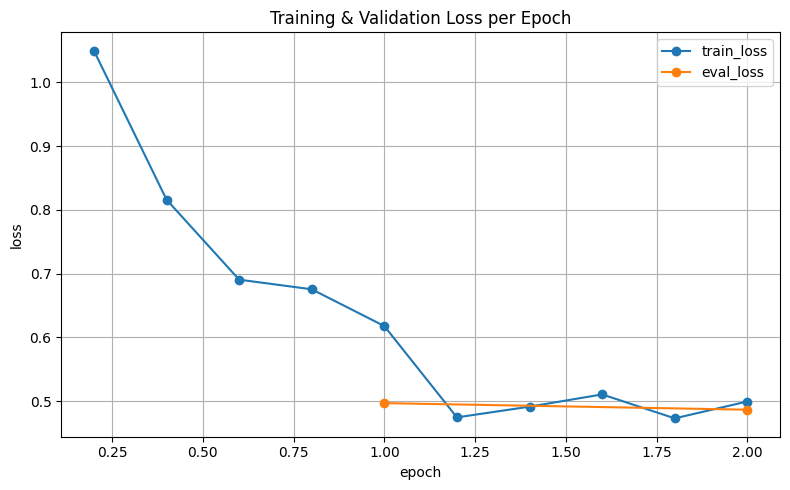

   epoch  train_loss  eval_loss  learning_rate
0    0.2      1.0494        NaN   1.804000e-05
1    0.4      0.8159        NaN   1.604000e-05
2    0.6      0.6905        NaN   1.404000e-05
3    0.8      0.6754        NaN   1.204000e-05
4    1.0      0.6177   0.496942   1.004000e-05
5    1.2      0.4746        NaN   8.040000e-06
6    1.4      0.4914        NaN   6.040000e-06
7    1.6      0.5106        NaN   4.040000e-06
8    1.8      0.4731        NaN   2.040000e-06
9    2.0      0.4995   0.486658   4.000000e-08


<Figure size 600x600 with 0 Axes>

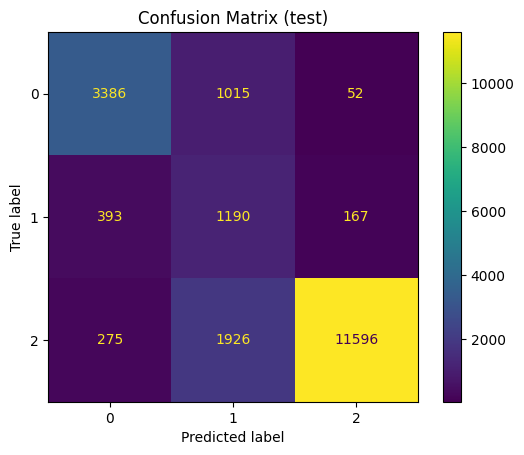

Saved loss plots and classification artifacts into: outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251130_051442_student_debug


In [37]:
# CELL B: Post-session plotting (run after kernel restart; no trainer in memory)
# Paste and run this cell. It finds a run folder and plots from saved CSV/JSON.
# If auto-find picks wrong folder, set run_outdir manually.

import os, glob
from src.utils import plot_loss_vs_epochs

# Option 1: paste your run folder path here (recommended)
run_outdir = None
# run_outdir = "outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251127_123456"  # <- example, paste your actual path

# Option 2: auto-find newest folder under outputs/
if run_outdir is None:
    base = "outputs"
    candidates = [d for d in glob.glob(os.path.join(base, "*")) if os.path.isdir(d)]
    if not candidates:
        raise FileNotFoundError("No run folders found under 'outputs/'. Provide run_outdir manually.")
    run_outdir = max(candidates, key=os.path.getmtime)
    print("Auto-selected latest run folder:", run_outdir)

# Prefer loss_per_epoch.csv if present
epoch_csv = os.path.join(run_outdir, "loss_per_epoch.csv")
if os.path.exists(epoch_csv):
    print("Found loss_per_epoch.csv — plotting from that CSV:", epoch_csv)
    df = plot_loss_vs_epochs(trainer=None, hist_csv=epoch_csv, run_outdir=run_outdir, show_plot=True)
    print(df)
else:
    # Try trainer_state_log_history.json or trainer_state.json
    json_candidates = [
        os.path.join(run_outdir, "trainer_state_log_history.json"),
        os.path.join(run_outdir, "trainer_state.json")
    ]
    found = False
    for jpath in json_candidates:
        if os.path.exists(jpath):
            print("Found", jpath, "- parsing and plotting.")
            df = plot_loss_vs_epochs(trainer=None, hist_csv=None, run_outdir=run_outdir, show_plot=True)
            found = True
            break
    if not found:
        # fallback: try any JSON under run_outdir
        parsed = False
        for root, _, files in os.walk(run_outdir):
            for f in files:
                if f.lower().endswith(".json"):
                    cand = os.path.join(root, f)
                    try:
                        # plot_loss_vs_epochs will scan and parse files under run_outdir
                        df = plot_loss_vs_epochs(trainer=None, hist_csv=None, run_outdir=run_outdir, show_plot=True)
                        parsed = True
                        break
                    except Exception:
                        continue
            if parsed:
                break
        if not parsed:
            raise FileNotFoundError("No epoch CSV or trainer_state JSON found in run_outdir. Check the folder or re-run the in-session cell after training.")

# 2) Classification report + confusion matrix
trainer = res_train["trainer"]
test_tok = res_train["test_tok"]
pred_out = trainer.predict(test_tok)
y_true = pred_out.label_ids
y_pred = pred_out.predictions.argmax(axis=-1)

report = classification_report(y_true, y_pred, digits=4, output_dict=True)
with open(os.path.join(run_outdir, "classification_report_combined.json"), "w", encoding="utf-8") as fh:
    json.dump(report, fh, indent=2)
pd.DataFrame(report).transpose().to_csv(os.path.join(run_outdir, "classification_report_combined.csv"))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(values_format='d')
plt.title("Confusion Matrix (test)")
plt.savefig(os.path.join(run_outdir, "confusion_matrix_combined.png"), bbox_inches='tight')
plt.show()

print("Saved loss plots and classification artifacts into:", run_outdir)

####Cell C — Quick CSV viewer (inspect numbers)

In [38]:
# CELL C: Quick view of saved loss_per_epoch.csv (optional)
import os, pandas as pd

# set run_outdir manually or reuse last used
try:
    run_outdir  # may be set by Cell B
except NameError:
    run_outdir = None

if run_outdir is None:
    run_outdir = input("Paste run_outdir path (or press Enter to auto-find latest under 'outputs/'): ").strip() or None

if run_outdir is None:
    import glob
    cand = glob.glob("outputs/*")
    cand = [c for c in cand if os.path.isdir(c)]
    if not cand:
        raise FileNotFoundError("No outputs folder found.")
    run_outdir = max(cand, key=os.path.getmtime)
    print("Auto-selected run_outdir:", run_outdir)

csv_path = os.path.join(run_outdir, "loss_per_epoch.csv")
if not os.path.exists(csv_path):
    print("loss_per_epoch.csv not found in", run_outdir)
else:
    df = pd.read_csv(csv_path)
    print("Loaded loss_per_epoch.csv:")
    display(df)


Loaded loss_per_epoch.csv:


,epoch,train_loss,eval_loss,learning_rate
0,0.2,1.0494,NaN,1.804000e-05
1,0.4,0.8159,NaN,1.604000e-05
2,0.6,0.6905,NaN,1.404000e-05
3,0.8,0.6754,NaN,1.204000e-05
4,1.0,0.6177,0.496942,1.004000e-05
5,1.2,0.4746,NaN,8.040000e-06
6,1.4,0.4914,NaN,6.040000e-06
7,1.6,0.5106,NaN,4.040000e-06
8,1.8,0.4731,NaN,2.040000e-06
9,2.0,0.4995,0.486658,4.000000e-08


##Grid Search Tuning